In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/US-Gun-Violence.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3230 entries, 0 to 3229
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   incident_id     3230 non-null   int64  
 1   incident_date   3230 non-null   object 
 2   state           3230 non-null   object 
 3   city_or_county  3230 non-null   object 
 4   address         3225 non-null   object 
 5   killed          3230 non-null   int64  
 6   injured         3228 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 176.8+ KB


In [5]:
df.describe()

,incident_id,killed,injured
count,3.230000e+03,3230.000000,3228.00000
mean,1.189816e+06,1.057276,4.19114
std,6.269377e+05,2.080927,8.02234
min,9.219400e+04,0.000000,0.00000
25%,6.106270e+05,0.000000,3.00000
50%,1.232031e+06,1.000000,4.00000
75%,1.750595e+06,1.000000,5.00000
max,2.128682e+06,59.000000,441.00000


In [6]:
df

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2128682,September 29 2021,Illinois,Chicago,800 block of N Milwaukee Ave,0,5.0
1,2127374,September 28 2021,Illinois,Chicago,65th St and Calumet Ave,1,3.0
2,2128023,September 28 2021,Minnesota,Minneapolis,2700 block of Bloomington Ave,1,3.0
3,2126747,September 27 2021,New York,New York (Manhattan),3964 10th Ave,0,5.0
4,2126450,September 27 2021,Illinois,Chicago,826 N Ridgeway Ave,1,3.0
...,...,...,...,...,...,...,...
3225,95550,January 12 2014,Alabama,Huntsville,University Drive,0,5.0
3226,95146,January 11 2014,Mississippi,Jackson,3430 W. Capitol Street,0,4.0
3227,94514,January 5 2014,Pennsylvania,Erie,829 Parade St,1,3.0
3228,92704,January 3 2014,New York,Queens,Farmers Boulevard and 133rd Avenue,1,3.0


In [7]:
stateSortdf = df[['incident_id','state','injured']] 

In [8]:
stateSortdf

,incident_id,state,injured
0,2128682,Illinois,5.0
1,2127374,Illinois,3.0
2,2128023,Minnesota,3.0
3,2126747,New York,5.0
4,2126450,Illinois,3.0
...,...,...,...
3225,95550,Alabama,5.0
3226,95146,Mississippi,4.0
3227,94514,Pennsylvania,3.0
3228,92704,New York,3.0


In [9]:
stateSortdf = df[['state','injured','killed']] 

In [10]:
stateSortdf

,state,injured,killed
0,Illinois,5.0,0
1,Illinois,3.0,1
2,Minnesota,3.0,1
3,New York,5.0,0
4,Illinois,3.0,1
...,...,...,...
3225,Alabama,5.0,0
3226,Mississippi,4.0,0
3227,Pennsylvania,3.0,1
3228,New York,3.0,1


In [11]:
stateSortdf.groupby(by = "state").sum().head(10)

,injured,killed
state,,
Alabama,315.0,89
Alaska,18.0,6
Arizona,116.0,58
Arkansas,167.0,32
California,1235.0,344
Colorado,156.0,55
Connecticut,113.0,13
Delaware,60.0,12
District of Columbia,249.0,25


In [12]:
stateSortdf.groupby(by = "state").sum().idxmax()

injured    Illinois
killed        Texas
dtype: object

In [13]:
stateSortdf.groupby(by = "state").sum().sort_values(by = 'injured', ascending = False).head(10)

,injured,killed
state,,
Illinois,1484.0,235
California,1235.0,344
Florida,892.0,273
Texas,840.0,355
New York,653.0,82
Louisiana,608.0,118
Pennsylvania,588.0,130
Ohio,568.0,142
Nevada,531.0,84


In [14]:
df["incident_date"] = pd.to_datetime(df["incident_date"])

In [15]:
df

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2128682,2021-09-29,Illinois,Chicago,800 block of N Milwaukee Ave,0,5.0
1,2127374,2021-09-28,Illinois,Chicago,65th St and Calumet Ave,1,3.0
2,2128023,2021-09-28,Minnesota,Minneapolis,2700 block of Bloomington Ave,1,3.0
3,2126747,2021-09-27,New York,New York (Manhattan),3964 10th Ave,0,5.0
4,2126450,2021-09-27,Illinois,Chicago,826 N Ridgeway Ave,1,3.0
...,...,...,...,...,...,...,...
3225,95550,2014-01-12,Alabama,Huntsville,University Drive,0,5.0
3226,95146,2014-01-11,Mississippi,Jackson,3430 W. Capitol Street,0,4.0
3227,94514,2014-01-05,Pennsylvania,Erie,829 Parade St,1,3.0
3228,92704,2014-01-03,New York,Queens,Farmers Boulevard and 133rd Avenue,1,3.0


In [16]:
#Narrow original DataFrame 'df' to include columns 'year' and 'month'

In [17]:
df['year'] = pd.DatetimeIndex(df['incident_date']).year
df['month'] = pd.DatetimeIndex(df['incident_date']).month

In [18]:
df

,incident_id,incident_date,state,city_or_county,address,killed,injured,year,month
0,2128682,2021-09-29,Illinois,Chicago,800 block of N Milwaukee Ave,0,5.0,2021,9
1,2127374,2021-09-28,Illinois,Chicago,65th St and Calumet Ave,1,3.0,2021,9
2,2128023,2021-09-28,Minnesota,Minneapolis,2700 block of Bloomington Ave,1,3.0,2021,9
3,2126747,2021-09-27,New York,New York (Manhattan),3964 10th Ave,0,5.0,2021,9
4,2126450,2021-09-27,Illinois,Chicago,826 N Ridgeway Ave,1,3.0,2021,9
...,...,...,...,...,...,...,...,...,...
3225,95550,2014-01-12,Alabama,Huntsville,University Drive,0,5.0,2014,1
3226,95146,2014-01-11,Mississippi,Jackson,3430 W. Capitol Street,0,4.0,2014,1
3227,94514,2014-01-05,Pennsylvania,Erie,829 Parade St,1,3.0,2014,1
3228,92704,2014-01-03,New York,Queens,Farmers Boulevard and 133rd Avenue,1,3.0,2014,1


In [19]:
#Making a new DataFrame composed of the 'year' and 'injured' to apply sum().

In [20]:
IncidentsByYear = df.groupby("year")["injured"].count()

In [21]:
IncidentsByYear

year
2014    270
2015    335
2016    382
2017    348
2018    336
2019    417
2020    610
2021    530
Name: injured, dtype: int64

<AxesSubplot:xlabel='year'>

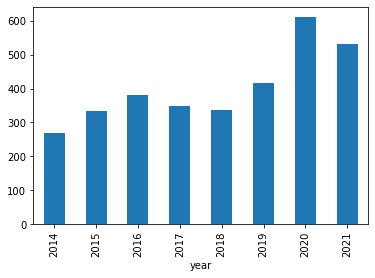

In [22]:
#Incidents By Year Plotted
IncidentsByYear.plot.bar(x='year', y='incidents')

In [23]:
InjuredByYear = df.groupby("year")["injured"].sum()

In [24]:
InjuredByYear

year
2014    1078.0
2015    1335.0
2016    1536.0
2017    1807.0
2018    1330.0
2019    1709.0
2020    2539.0
2021    2195.0
Name: injured, dtype: float64

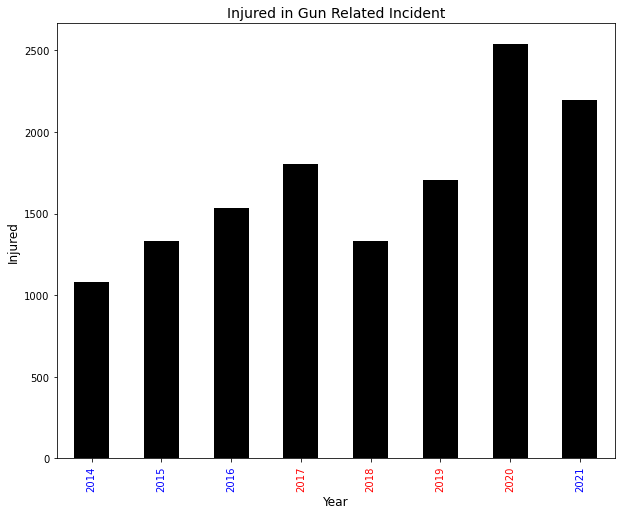

In [25]:
#Injured By Year Plotted
ax = InjuredByYear.plot.bar(x='year', y='injured', color = 'black', figsize = (10,8))
ax.set_title('Injured in Gun Related Incident', fontdict={'fontsize':14})
ax.set_xlabel('Year', fontdict={'fontsize':12})
ax.set_ylabel('Injured', fontdict={'fontsize':12})
ax.get_xticklabels()[0].set_color("blue")
ax.get_xticklabels()[1].set_color("blue")
ax.get_xticklabels()[2].set_color("blue")
ax.get_xticklabels()[3].set_color("red")
ax.get_xticklabels()[4].set_color("red")
ax.get_xticklabels()[5].set_color("red")
ax.get_xticklabels()[6].set_color("red")
ax.get_xticklabels()[7].set_color("blue")

In [26]:
KilledByYear = df.groupby("year")["killed"].sum()

In [27]:
KilledByYear

year
2014    267
2015    367
2016    452
2017    441
2018    372
2019    465
2020    513
2021    538
Name: killed, dtype: int64

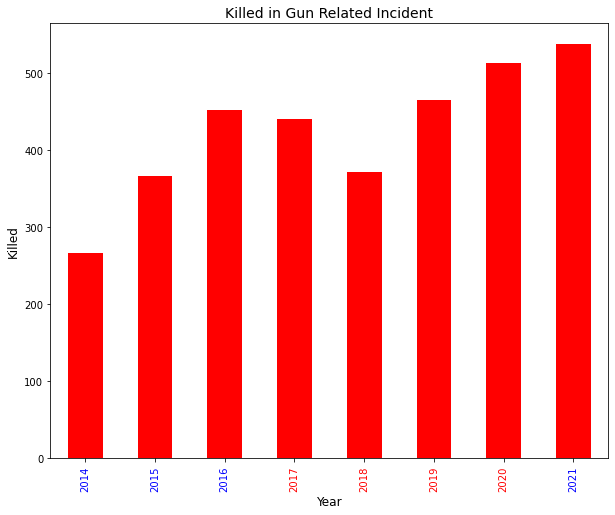

In [28]:
ax = KilledByYear.plot.bar(x='year', y='killed', figsize = (10,8), color = 'red')
ax.set_title('Killed in Gun Related Incident', fontdict={'fontsize':14})
ax.set_xlabel('Year', fontdict={'fontsize':12})
ax.set_ylabel('Killed', fontdict={'fontsize':12})
ax.get_xticklabels()[0].set_color("blue")
ax.get_xticklabels()[1].set_color("blue")
ax.get_xticklabels()[2].set_color("blue")
ax.get_xticklabels()[3].set_color("red")
ax.get_xticklabels()[4].set_color("red")
ax.get_xticklabels()[5].set_color("red")
ax.get_xticklabels()[6].set_color("red")
ax.get_xticklabels()[7].set_color("blue")

In [29]:
#Sort Data by State regardless of year.

In [30]:
stateSortdf

,state,injured,killed
0,Illinois,5.0,0
1,Illinois,3.0,1
2,Minnesota,3.0,1
3,New York,5.0,0
4,Illinois,3.0,1
...,...,...,...
3225,Alabama,5.0,0
3226,Mississippi,4.0,0
3227,Pennsylvania,3.0,1
3228,New York,3.0,1


In [31]:
stateSortdf.groupby(by = "state").sum().sort_values(by = 'injured', ascending = False).head(10)

,injured,killed
state,,
Illinois,1484.0,235
California,1235.0,344
Florida,892.0,273
Texas,840.0,355
New York,653.0,82
Louisiana,608.0,118
Pennsylvania,588.0,130
Ohio,568.0,142
Nevada,531.0,84


In [ ]:
stateSortdf.plot.bar(x='state', y='injured')

In [ ]:
#IncidentsByState = df.groupby("state").sort_value("injured", ascending = False)["injured"]
IncidentsByState = stateSortdf.groupby(by="state").sum().sort_values(by="injured", ascending=False)

In [ ]:
IncidentsByState

In [ ]:
#IncidentsByState.plot.bar(x='state', y='injured')
ax = IncidentsByState.plot(kind="bar", figsize = (13,8), color = {"killed": "red", "injured": "black"})#(x="", y=["injured", "killed"], kind="bar")
ax.set_title('Gun Related Incidents per State 2014-2021', fontdict={'fontsize':18})
ax.set_xlabel('State', fontdict={'fontsize':14})
ax.set_ylabel('Killed/Injured', fontdict={'fontsize':14})
ax.get_xticklabels()[0].set_color("blue")
ax.get_xticklabels()[1].set_color("blue")
ax.get_xticklabels()[2].set_color("purple")
ax.get_xticklabels()[3].set_color("red")
ax.get_xticklabels()[4].set_color("blue")
ax.get_xticklabels()[5].set_color("red")
ax.get_xticklabels()[6].set_color("blue")
ax.get_xticklabels()[7].set_color("purple")
ax.get_xticklabels()[8].set_color("blue")
ax.get_xticklabels()[9].set_color("red")
ax.get_xticklabels()[10].set_color("red")
ax.get_xticklabels()[11].set_color("red")
ax.get_xticklabels()[12].set_color("blue")
ax.get_xticklabels()[13].set_color("blue")
ax.get_xticklabels()[14].set_color("blue")
ax.get_xticklabels()[15].set_color("red")
ax.get_xticklabels()[16].set_color("red")
ax.get_xticklabels()[17].set_color("red")
ax.get_xticklabels()[18].set_color("blue")
ax.get_xticklabels()[19].set_color("red")
ax.get_xticklabels()[20].set_color("blue")
ax.get_xticklabels()[21].set_color("red")
ax.get_xticklabels()[22].set_color("red")
ax.get_xticklabels()[23].set_color("red")
ax.get_xticklabels()[24].set_color("blue")
ax.get_xticklabels()[25].set_color("blue")
ax.get_xticklabels()[26].set_color("blue")
ax.get_xticklabels()[27].set_color("red")
ax.get_xticklabels()[28].set_color("blue")
ax.get_xticklabels()[29].set_color("blue")
ax.get_xticklabels()[30].set_color("blue")
ax.get_xticklabels()[31].set_color("red")
ax.get_xticklabels()[32].set_color("red")
ax.get_xticklabels()[33].set_color("blue")
ax.get_xticklabels()[34].set_color("blue")
ax.get_xticklabels()[35].set_color("red")
ax.get_xticklabels()[36].set_color("purple")
ax.get_xticklabels()[37].set_color("red")
ax.get_xticklabels()[38].set_color("blue")
ax.get_xticklabels()[39].set_color("red")
ax.get_xticklabels()[40].set_color("red")
ax.get_xticklabels()[41].set_color("red")
ax.get_xticklabels()[42].set_color("red")
ax.get_xticklabels()[43].set_color("blue")
ax.get_xticklabels()[44].set_color("red")
ax.get_xticklabels()[45].set_color("red")
ax.get_xticklabels()[46].set_color("blue")
ax.get_xticklabels()[47].set_color("red")
ax.get_xticklabels()[48].set_color("blue")

In [38]:
Year2018 = df[df["year"]==2018]

In [39]:
Year2018

,incident_id,incident_date,state,city_or_county,address,killed,injured,year,month
1559,1289686,2018-12-31,Ohio,Cleveland,4462 Denison Ave,3,2.0,2018,12
1560,1288376,2018-12-29,Ohio,Lima,904 S Main St,1,3.0,2018,12
1561,1287286,2018-12-28,Missouri,Saint Charles,150 Whetstone Dr,4,1.0,2018,12
1562,1284586,2018-12-24,Louisiana,Lutcher,2176 Main St,2,2.0,2018,12
1563,1283229,2018-12-23,Missouri,Springfield,1042 W College St,1,6.0,2018,12
...,...,...,...,...,...,...,...,...,...
1890,1022067,2018-01-07,Alabama,Union Springs,US-29,1,5.0,2018,1
1891,1022055,2018-01-07,Florida,Plantation,5225 W Broward Blvd,0,4.0,2018,1
1892,1021788,2018-01-05,Mississippi,Hattiesburg,6168 US 49,0,6.0,2018,1
1893,1020574,2018-01-04,Arkansas,Brinkley,615 W 6th St,1,3.0,2018,1


In [40]:
Year2018[['state','injured','killed']] 

,state,injured,killed
1559,Ohio,2.0,3
1560,Ohio,3.0,1
1561,Missouri,1.0,4
1562,Louisiana,2.0,2
1563,Missouri,6.0,1
...,...,...,...
1890,Alabama,5.0,1
1891,Florida,4.0,0
1892,Mississippi,6.0,0
1893,Arkansas,3.0,1


In [48]:
IncidentsByStateYear2018 = Year2018.groupby(by="state").sum().sort_values(by="injured", ascending=False)

<AxesSubplot:>

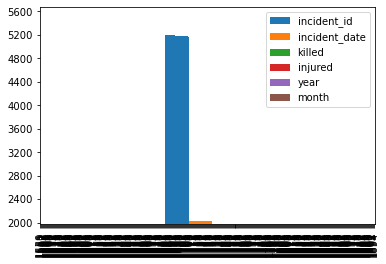

In [51]:
Year2018.plot(kind="bar")